In [1]:
library(survival)
library(ggplot2)
library(dplyr)
library(reshape2)
library(stringr)

Warning message:
“package ‘survival’ was built under R version 4.0.5”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘reshape2’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”


In [2]:
dir_fig = 'R_clogit/for_publish_fin/'

file_dir = 'combined_tables_missing/'

##use_gw_cov = FALSE
#use_gw_cov = TRUE
#use_gw_cov_ooc = FALSE
##use_gw_cov_ooc = TRUE
#gw_suf = ''
#gw_suf_ooc = ''
#gw_var = ''
#if (use_gw_cov) {
#    gw_suf = '_useGWB'
#    if (use_gw_cov_ooc) {
#        gw_suf_ooc = '_OOC'
#    }
#    gw_var = 'count_genomewide'
#}


#use_gw_cov = FALSE
use_gw_cov = TRUE
gw_suf = ''
gw_var_base = ''
#plat_var_suffs = c('_lr', '_lr_il_ilgt', '_il')
plat_var_suffs = c('_lr_il_ilgt', '_il')
if (use_gw_cov) {
    gw_suf = '_useGWB'
    gw_var_base = 'count_genomewide'
}

In [3]:
### clean features
fts = c('PLIp9_cds + PLIp9_utr')
fts_labels = c('pLI≥.9, exonic')
fts_cats = c('pLI≥.9')
fts_func = c('exonic')
fts_col_names = c('pli_genes_exonic')

### lr genotypes for LR_IL
#plat_cats = c('lr', 'lr_il_lrgt', 'il', 'lr + lr_il_lrgt + il', 'lr_il_lrgt + il')
#plat_cats_labels = c('LR only', 'LR/IL', 'IL only', 'LR only + LR/IL + IL only', 'LR/IL + IL only')

### il genotypes for LR_IL
plat_cats = c('lr', 'lr_il_ilgt', 'il', 'lr + lr_il_ilgt + il', 'lr_il_ilgt + il')
plat_cats_labels = c('LR only', 'LR/IL', 'IL only', 'LR only + LR/IL + IL only', 'LR/IL + IL only')

In [4]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

In [5]:
#prs_mode = 'sbayesr'
prs_mode = 'prscs'
#file_suf = 'SQ70_SAMPLES_AD2_SAMPLES'
file_suf = 'SQ20_SAMPLES_AD2_SAMPLES'
#file_suf = 'SQ30_SAMPLES_AD2_SAMPLES'
#file_suf = 'SQ40_SAMPLES_AD2_SAMPLES'
#file_suf = 'SQ50_SAMPLES_AD2_SAMPLES'
#file_suf = 'SQ60_SAMPLES_AD2_SAMPLES'
#file_suf = 'SQ70_SAMPLES_AD2_SAMPLES_HP12'
#file_suf = 'SQ70_SAMPLES_AD2_SAMPLES_NCOM'
#file_suf = 'SQ50_SAMPLES_AD2_SAMPLES'
file_suf_trmissing = '25'
#file_suf_trmissing = '20'
#file_suf_trmissing = '15'
if (prs_mode == 'sbayesr') {
    file_main = paste0(file_dir, 'combined_svs_trs_snvs_prs_pc_sbayesr_', file_suf, '_DELINS_GW_plat', '_TRmissingness', file_suf_trmissing, '_fltHomPol_famGT.csv')
} else if (prs_mode == 'prscs') {
    file_main = paste0(file_dir, 'combined_svs_trs_snvs_prs_pc_prscs_', file_suf, '_DELINS_GW_plat', '_TRmissingness', file_suf_trmissing, '_fltHomPol_famGT.csv')}

df_main <- read.table(file_main, header = TRUE, sep = ",")
#df_main['count_PLIp9_nonLOF_DEV_BR_10_cds'] = df_main[,'count_PLIp9_DEV_BR_GENE_10_cds'] - df_main[,'count_PLIp9_LOF_DEV_BR_10_cds']
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
dim(df_main)
df_main

[1]  243 5573

fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_ins,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q_del,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q_ins,PRS_ASD_Z,PRS_SCZ_Z,PRS_EDU_Z,count_dnlof_inhlof,count_cnvs_sh,count_cnvs_cl
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,0,0,0,0,-0.971701072,-0.510485305,0.82162924,0,0,0
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,0,0,0,0,0.303644763,0.817056455,0.06312390,1,0,0
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,0,0,0,0,0.595643472,-0.305436874,1.94303491,2,0,0
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,0,0,0,1.166191828,0.943709479,-2.78896425,1,0,0
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,0,0,0,0,0.703902177,-0.152554399,0.06482359,0,0,0
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,0,0,0,0,0.384605619,0.209070495,0.16440487,0,0,0
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,0,0,0,0,-0.898010204,-0.994547648,0.53088874,1,0,0
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,0,0,0,0,-1.036073363,-1.487948561,0.29231934,1,0,0
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,0,0,0,0,0.817923575,-0.003587407,-0.08546761,1,0,0


In [6]:
### ont/pb specific data frames
df_main_ont = df_main %>% filter(Platform == 'ONT')
df_main_pb = df_main %>% filter(Platform == 'PB')
print(dim(df_main_ont))
print(dim(df_main_pb))

[1]  101 5573
[1]  142 5573


In [7]:
### SVs All
### Notes: 
#     the log odds is based on natural logorithm. The wiskers of the coeficients are based on 95% confidence intervals
#     ANNOVA p-value computed based on LRT from null and the model is the same as the p-value reported in the model for the coefficient

PRINT_INFO = TRUE
#PRINT_INFO = FALSE
SHOW_FORMULA = TRUE

ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
SEs = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
fts_loop = c()
fts_labels_loop = c()
plat_cats_loop = c()
plat_cats_labels_loop = c()
for (i_ft in 1:length(fts)) {
    ft = fts[i_ft]
    ft_label = fts_labels[i_ft]
    # make vector of features
    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    print('this ft:')
    print(ft)
    for (i_plat_cat in 1:length(plat_cats)) {
        plat_cat = plat_cats[i_plat_cat]
        plat_cat_label = plat_cats_labels[i_plat_cat]
        print('plat_cat:')
        print(plat_cat)

        # make loop fts & plats
        fts_loop = c(fts_loop, ft)
        fts_labels_loop = c(fts_labels_loop, ft_label)
        plat_cats_loop = c(plat_cats_loop, plat_cat)
        plat_cats_labels_loop = c(plat_cats_labels_loop, plat_cat_label)
        
        # make vector of platforms
        pl_tmp = unlist(strsplit(plat_cat, split='+', fixed=TRUE)) # split vars with +
        pl_tmp = str_trim(pl_tmp) # trim spaces
        #print('pl_tmp:')
        #print(pl_tmp)

        # make the sum of burden variables
        var_tmp = c()
        for (ft_ in ft_tmp) {
            var_tmp = c(var_tmp, paste0('count_', ft_, '_', pl_tmp))
        }
        print(var_tmp)

        new_df = df_main
        new_df['new_var'] = 0
        for (var_ in var_tmp) {
            new_df['new_var'] = new_df['new_var'] + df_main[var_]
        }
        var = 'new_var'

        #if (plat_cat == 'lr + lr_il_ilgt + il') {
        if (plat_cat == 'lr_il_ilgt + il') {
            #print('data for plat:')
            #print(plat_cat)
            #print(new_df[c('iid', 'new_var')])
        }

        ### make genomewide burden
        gw_var = ''
        if (use_gw_cov) {
            gw_var = 'gw_burden'
            new_df[gw_var] = 0
            for (pl_ in pl_tmp) {
                var_gw = paste0('count_genomewide_', pl_)
                new_df[gw_var] = new_df[gw_var] + new_df[var_gw]
            }
        }

        null_formula = as.formula(paste('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +', gw_var,
                              '+ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        if (SHOW_FORMULA) {
            print(null_formula)
            SHOW_FORMULA = FALSE
        }
        
        sum_case = sum(new_df[new_df$Phenotype==1,][,var])
        sum_control = sum(new_df[new_df$Phenotype==0,][,var])
        sum_cases = c(sum_cases, sum_case)
        sum_controls = c(sum_controls, sum_control)
        
        model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +', gw_var,
                                         '+ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
            
        null_model <- clogit(null_formula, data = new_df)
        #print(summary(null_model))
        
        clogit_model <- clogit(model_formula, data = new_df)
        #print(summary(clogit_model))
        #print(str(summary(clogit_model)))
        OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
        OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
        OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
        log_OR = summary(clogit_model)$coefficients[var, 'coef']
        log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
        log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
        SE = summary(clogit_model)$coefficients[var, 'se(coef)']
        pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
        ORs = c(ORs, OR)
        ORs_plus = c(ORs_plus, OR_plus)
        ORs_minus = c(ORs_minus, OR_minus)
        log_ORs = c(log_ORs, log_OR)
        log_ORs_plus = c(log_ORs_plus, log_OR_plus)
        log_ORs_minus = c(log_ORs_minus, log_OR_minus)
        SEs = c(SEs, SE)
        pvals = c(pvals, pval)
            
        ano <- anova(null_model, clogit_model, test='LRT')
        ano_pval = ano$"Pr(>|Chi|)"[2]
        ano_pvals = c(ano_pvals, ano_pval)
    }
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('SEs:')
    print(SEs)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

my_data = data.frame('fts' = fts_loop, 'fts_labels' = fts_labels_loop, 'plat' = plat_cats_loop, 'plat_labels' = plat_cats_labels_loop,
                     'log_ORs' = log_ORs, 'log_ORs_plus' = log_ORs_plus, 'log_ORs_minus' = log_ORs_minus, 
                     'ano_pval' = ano_pvals, 'SEs' = SEs,
                     'sum_case_con' = sum_case_controls)

### write burden test tables
this_cols = c('fts_labels', 'plat_labels', 'log_ORs', 'log_ORs_plus', 'log_ORs_minus', 'ano_pval', 'SEs')
new_cols = c('Category', 'platform', 'log OR', 'upper 95% CI', 'lower 95% CI', 'p-value', 'log OR SE')
this_data_out = my_data[this_cols]
# formating the columns with number of digits
for (i_col in 3:length(this_cols)) {
    this_col = this_cols[i_col]
    this_data_out[this_col] = format(this_data_out[this_col], digits = 4, nsmall = 2)
}
colnames(this_data_out) <- new_cols
print(this_data_out)
file_out = paste0(dir_fig, 'burden_tests_table_platforms_svs_MEGA.tsv')
print(file_out)
write.table(this_data_out, file = file_out, sep = "\t", row.names = FALSE, quote = FALSE)

[1] "this ft:"
[1] "PLIp9_cds + PLIp9_utr"
[1] "plat_cat:"
[1] "lr"
[1] "count_PLIp9_cds_lr" "count_PLIp9_utr_lr"
Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z + 
    gw_burden + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + 
    PC9 + PC10 + strata(fid)
[1] "plat_cat:"
[1] "lr_il_ilgt"
[1] "count_PLIp9_cds_lr_il_ilgt" "count_PLIp9_utr_lr_il_ilgt"
[1] "plat_cat:"
[1] "il"
[1] "count_PLIp9_cds_il" "count_PLIp9_utr_il"
[1] "plat_cat:"
[1] "lr + lr_il_ilgt + il"
[1] "count_PLIp9_cds_lr"         "count_PLIp9_cds_lr_il_ilgt"
[3] "count_PLIp9_cds_il"         "count_PLIp9_utr_lr"        
[5] "count_PLIp9_utr_lr_il_ilgt" "count_PLIp9_utr_il"        
[1] "plat_cat:"
[1] "lr_il_ilgt + il"
[1] "count_PLIp9_cds_lr_il_ilgt" "count_PLIp9_cds_il"        
[3] "count_PLIp9_utr_lr_il_ilgt" "count_PLIp9_utr_il"        
[1] "ORs:"
[1] 0.9903129 1.1661815 2.1343444 1.2559482 1.3143933
[1] "ORs_plus:"
[1] 1.722992 1.666572 5.007397 1.686689 1.864492
[1] "ORs_minus:"
[1] 0.5691957 0.8160

In [8]:
### SVs ONT
PRINT_INFO = TRUE
#PRINT_INFO = FALSE
SHOW_FORMULA = TRUE

ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
SEs = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
fts_loop = c()
fts_labels_loop = c()
plat_cats_loop = c()
plat_cats_labels_loop = c()
for (i_ft in 1:length(fts)) {
    ft = fts[i_ft]
    ft_label = fts_labels[i_ft]
    # make vector of features
    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    print('this ft:')
    print(ft)
    for (i_plat_cat in 1:length(plat_cats)) {
        plat_cat = plat_cats[i_plat_cat]
        plat_cat_label = plat_cats_labels[i_plat_cat]
        print('plat_cat:')
        print(plat_cat)

        # make loop fts & plats
        fts_loop = c(fts_loop, ft)
        fts_labels_loop = c(fts_labels_loop, ft_label)
        plat_cats_loop = c(plat_cats_loop, plat_cat)
        plat_cats_labels_loop = c(plat_cats_labels_loop, plat_cat_label)
        
        # make vector of platforms
        pl_tmp = unlist(strsplit(plat_cat, split='+', fixed=TRUE)) # split vars with +
        pl_tmp = str_trim(pl_tmp) # trim spaces
        #print('pl_tmp:')
        #print(pl_tmp)

        # make the sum of burden variables
        var_tmp = c()
        for (ft_ in ft_tmp) {
            var_tmp = c(var_tmp, paste0('count_', ft_, '_', pl_tmp))
        }
        print(var_tmp)

        new_df = df_main_ont
        new_df['new_var'] = 0
        for (var_ in var_tmp) {
            new_df['new_var'] = new_df['new_var'] + df_main_ont[var_]
        }
        var = 'new_var'

        #if (plat_cat == 'lr + lr_il_ilgt + il') {
        if (plat_cat == 'lr_il_ilgt + il') {
            #print('data for plat:')
            #print(plat_cat)
            #print(new_df[c('iid', 'new_var')])
        }

        ### make genomewide burden
        gw_var = ''
        if (use_gw_cov) {
            gw_var = 'gw_burden'
            new_df[gw_var] = 0
            for (pl_ in pl_tmp) {
                var_gw = paste0('count_genomewide_', pl_)
                new_df[gw_var] = new_df[gw_var] + new_df[var_gw]
            }
        }

        null_formula = as.formula(paste('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +', gw_var,
                              '+ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        if (SHOW_FORMULA) {
            print(null_formula)
            SHOW_FORMULA = FALSE
        }
        
        sum_case = sum(new_df[new_df$Phenotype==1,][,var])
        sum_control = sum(new_df[new_df$Phenotype==0,][,var])
        sum_cases = c(sum_cases, sum_case)
        sum_controls = c(sum_controls, sum_control)
        
        model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +', gw_var,
                                         '+ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
            
        null_model <- clogit(null_formula, data = new_df)
        #print(summary(null_model))
        
        clogit_model <- clogit(model_formula, data = new_df)
        #print(summary(clogit_model))
        #print(str(summary(clogit_model)))
        OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
        OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
        OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
        log_OR = summary(clogit_model)$coefficients[var, 'coef']
        log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
        log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
        SE = summary(clogit_model)$coefficients[var, 'se(coef)']
        pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
        ORs = c(ORs, OR)
        ORs_plus = c(ORs_plus, OR_plus)
        ORs_minus = c(ORs_minus, OR_minus)
        log_ORs = c(log_ORs, log_OR)
        log_ORs_plus = c(log_ORs_plus, log_OR_plus)
        log_ORs_minus = c(log_ORs_minus, log_OR_minus)
        SEs = c(SEs, SE)
        pvals = c(pvals, pval)
            
        ano <- anova(null_model, clogit_model, test='LRT')
        ano_pval = ano$"Pr(>|Chi|)"[2]
        ano_pvals = c(ano_pvals, ano_pval)
    }
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('SEs:')
    print(SEs)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

my_data_all_ont = cbind(my_data, data.frame('log_ORs_ont' = log_ORs, 'log_ORs_plus_ont' = log_ORs_plus, 'log_ORs_minus_ont' = log_ORs_minus, 
                     'ano_pval_ont' = ano_pvals, 'SEs_ont' = SEs,
                     'sum_case_con_ont' = sum_case_controls))

[1] "this ft:"
[1] "PLIp9_cds + PLIp9_utr"
[1] "plat_cat:"
[1] "lr"
[1] "count_PLIp9_cds_lr" "count_PLIp9_utr_lr"
Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z + 
    gw_burden + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + 
    PC9 + PC10 + strata(fid)
[1] "plat_cat:"
[1] "lr_il_ilgt"
[1] "count_PLIp9_cds_lr_il_ilgt" "count_PLIp9_utr_lr_il_ilgt"
[1] "plat_cat:"
[1] "il"
[1] "count_PLIp9_cds_il" "count_PLIp9_utr_il"
[1] "plat_cat:"
[1] "lr + lr_il_ilgt + il"
[1] "count_PLIp9_cds_lr"         "count_PLIp9_cds_lr_il_ilgt"
[3] "count_PLIp9_cds_il"         "count_PLIp9_utr_lr"        
[5] "count_PLIp9_utr_lr_il_ilgt" "count_PLIp9_utr_il"        
[1] "plat_cat:"
[1] "lr_il_ilgt + il"
[1] "count_PLIp9_cds_lr_il_ilgt" "count_PLIp9_cds_il"        
[3] "count_PLIp9_utr_lr_il_ilgt" "count_PLIp9_utr_il"        
[1] "ORs:"
[1] 0.8898819 1.0791701 0.9938705 1.0730024 1.0810493
[1] "ORs_plus:"
[1] 2.034199 2.053980 6.411550 1.771142 1.990045
[1] "ORs_minus:"
[1] 0.3892883 0.5670

In [9]:
### SVs PB
PRINT_INFO = TRUE
#PRINT_INFO = FALSE
SHOW_FORMULA = TRUE

ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
SEs = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
fts_loop = c()
fts_labels_loop = c()
plat_cats_loop = c()
plat_cats_labels_loop = c()
for (i_ft in 1:length(fts)) {
    ft = fts[i_ft]
    ft_label = fts_labels[i_ft]
    # make vector of features
    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    print('this ft:')
    print(ft)
    for (i_plat_cat in 1:length(plat_cats)) {
        plat_cat = plat_cats[i_plat_cat]
        plat_cat_label = plat_cats_labels[i_plat_cat]
        print('plat_cat:')
        print(plat_cat)

        # make loop fts & plats
        fts_loop = c(fts_loop, ft)
        fts_labels_loop = c(fts_labels_loop, ft_label)
        plat_cats_loop = c(plat_cats_loop, plat_cat)
        plat_cats_labels_loop = c(plat_cats_labels_loop, plat_cat_label)
        
        # make vector of platforms
        pl_tmp = unlist(strsplit(plat_cat, split='+', fixed=TRUE)) # split vars with +
        pl_tmp = str_trim(pl_tmp) # trim spaces
        #print('pl_tmp:')
        #print(pl_tmp)

        # make the sum of burden variables
        var_tmp = c()
        for (ft_ in ft_tmp) {
            var_tmp = c(var_tmp, paste0('count_', ft_, '_', pl_tmp))
        }
        print(var_tmp)

        new_df = df_main_pb
        new_df['new_var'] = 0
        for (var_ in var_tmp) {
            new_df['new_var'] = new_df['new_var'] + df_main_pb[var_]
        }
        var = 'new_var'

        #if (plat_cat == 'lr + lr_il_ilgt + il') {
        if (plat_cat == 'lr_il_ilgt + il') {
            #print('data for plat:')
            #print(plat_cat)
            #print(new_df[c('iid', 'new_var')])
        }

        ### make genomewide burden
        gw_var = ''
        if (use_gw_cov) {
            gw_var = 'gw_burden'
            new_df[gw_var] = 0
            for (pl_ in pl_tmp) {
                var_gw = paste0('count_genomewide_', pl_)
                new_df[gw_var] = new_df[gw_var] + new_df[var_gw]
            }
        }

        null_formula = as.formula(paste('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +', gw_var,
                              '+ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        if (SHOW_FORMULA) {
            print(null_formula)
            SHOW_FORMULA = FALSE
        }
        
        sum_case = sum(new_df[new_df$Phenotype==1,][,var])
        sum_control = sum(new_df[new_df$Phenotype==0,][,var])
        sum_cases = c(sum_cases, sum_case)
        sum_controls = c(sum_controls, sum_control)
        
        model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +', gw_var,
                                         '+ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
            
        null_model <- clogit(null_formula, data = new_df)
        #print(summary(null_model))
        
        clogit_model <- clogit(model_formula, data = new_df)
        #print(summary(clogit_model))
        #print(str(summary(clogit_model)))
        OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
        OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
        OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
        log_OR = summary(clogit_model)$coefficients[var, 'coef']
        log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
        log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
        SE = summary(clogit_model)$coefficients[var, 'se(coef)']
        pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
        ORs = c(ORs, OR)
        ORs_plus = c(ORs_plus, OR_plus)
        ORs_minus = c(ORs_minus, OR_minus)
        log_ORs = c(log_ORs, log_OR)
        log_ORs_plus = c(log_ORs_plus, log_OR_plus)
        log_ORs_minus = c(log_ORs_minus, log_OR_minus)
        SEs = c(SEs, SE)
        pvals = c(pvals, pval)
            
        ano <- anova(null_model, clogit_model, test='LRT')
        ano_pval = ano$"Pr(>|Chi|)"[2]
        ano_pvals = c(ano_pvals, ano_pval)
    }
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('SEs:')
    print(SEs)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

my_data_all_ont_pb = cbind(my_data_all_ont, data.frame('log_ORs_pb' = log_ORs, 'log_ORs_plus_pb' = log_ORs_plus, 'log_ORs_minus_pb' = log_ORs_minus, 
                     'ano_pval_pb' = ano_pvals, 'SEs_pb' = SEs,
                     'sum_case_con_pb' = sum_case_controls))

[1] "this ft:"
[1] "PLIp9_cds + PLIp9_utr"
[1] "plat_cat:"
[1] "lr"
[1] "count_PLIp9_cds_lr" "count_PLIp9_utr_lr"
Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z + 
    gw_burden + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + 
    PC9 + PC10 + strata(fid)
[1] "plat_cat:"
[1] "lr_il_ilgt"
[1] "count_PLIp9_cds_lr_il_ilgt" "count_PLIp9_utr_lr_il_ilgt"
[1] "plat_cat:"
[1] "il"
[1] "count_PLIp9_cds_il" "count_PLIp9_utr_il"
[1] "plat_cat:"
[1] "lr + lr_il_ilgt + il"
[1] "count_PLIp9_cds_lr"         "count_PLIp9_cds_lr_il_ilgt"
[3] "count_PLIp9_cds_il"         "count_PLIp9_utr_lr"        
[5] "count_PLIp9_utr_lr_il_ilgt" "count_PLIp9_utr_il"        
[1] "plat_cat:"
[1] "lr_il_ilgt + il"
[1] "count_PLIp9_cds_lr_il_ilgt" "count_PLIp9_cds_il"        
[3] "count_PLIp9_utr_lr_il_ilgt" "count_PLIp9_utr_il"        
[1] "ORs:"
[1] 1.182950 1.303739 2.558020 1.532176 1.556882
[1] "ORs_plus:"
[1] 3.823187 2.256698 9.365962 2.497883 2.646851
[1] "ORs_minus:"
[1] 0.3660221 0.7531961 0

In [10]:
my_data_all_ont_pb['wt_ont'] = 1 / (my_data_all_ont_pb$SEs_ont^2)
my_data_all_ont_pb['wt_pb'] = 1 / (my_data_all_ont_pb$SEs_pb^2)
my_data_all_ont_pb['se_meta'] = sqrt(1 / (my_data_all_ont_pb['wt_ont'] + my_data_all_ont_pb['wt_pb']))
my_data_all_ont_pb['log_ORs_meta'] = ((my_data_all_ont_pb['log_ORs_ont']*my_data_all_ont_pb['wt_ont'] + 
                                          my_data_all_ont_pb['log_ORs_pb']*my_data_all_ont_pb['wt_pb']) / 
                                         (my_data_all_ont_pb['wt_ont'] + my_data_all_ont_pb['wt_pb']))
my_data_all_ont_pb['log_ORs_plus_meta'] = my_data_all_ont_pb['log_ORs_meta'] + my_data_all_ont_pb['se_meta']
my_data_all_ont_pb['log_ORs_minus_meta'] = my_data_all_ont_pb['log_ORs_meta'] - my_data_all_ont_pb['se_meta']
my_data_all_ont_pb['Z_meta'] = my_data_all_ont_pb['log_ORs_meta'] / my_data_all_ont_pb['se_meta']
my_data_all_ont_pb = my_data_all_ont_pb[!is.na(my_data_all_ont_pb['Z_meta']),]
my_data_all_ont_pb['ano_pval_meta'] = sapply(my_data_all_ont_pb['Z_meta'], function(x) 2 * (1 - pnorm(abs(x))))

In [11]:
### write burden test tables
this_cols = c('fts_labels', 'plat_labels', 'log_ORs_meta', 'log_ORs_plus_meta', 'log_ORs_minus_meta', 'ano_pval_meta', 'se_meta')
new_cols = c('Category', 'platform', 'log OR', 'upper 95% CI', 'lower 95% CI', 'p-value', 'log OR SE')
this_data_out = my_data_all_ont_pb[this_cols]
# formating the columns with number of digits
for (i_col in 3:length(this_cols)) {
    this_col = this_cols[i_col]
    this_data_out[this_col] = format(this_data_out[this_col], digits = 4, nsmall = 2)
}
colnames(this_data_out) <- new_cols
print(this_data_out)
file_out = paste0(dir_fig, 'burden_tests_table_platforms_svs_META.tsv')
print(file_out)
write.table(this_data_out, file = file_out, sep = "\t", row.names = FALSE, quote = FALSE)

        Category                  platform   log OR upper 95% CI lower 95% CI
1 pLI≥.9, exonic                   LR only -0.02219       0.3226     -0.36699
2 pLI≥.9, exonic                     LR/IL  0.18567       0.3987     -0.02736
3 pLI≥.9, exonic                   IL only  0.63062       1.1741      0.08716
4 pLI≥.9, exonic LR only + LR/IL + IL only  0.25304       0.4316      0.07451
5 pLI≥.9, exonic           LR/IL + IL only  0.28561       0.4899      0.08130
  p-value log OR SE
1  0.9487    0.3448
2  0.3834    0.2130
3  0.2459    0.5435
4  0.1564    0.1785
5  0.1621    0.2043
[1] "R_clogit/for_publish_fin/burden_tests_table_platforms_svs_META.tsv"


[1] "R_clogit/for_publish_fin/pli_genes_exonic_SVs_burden_platform_SQ20_SAMPLES_AD2_SAMPLES_useGWB_META.png"


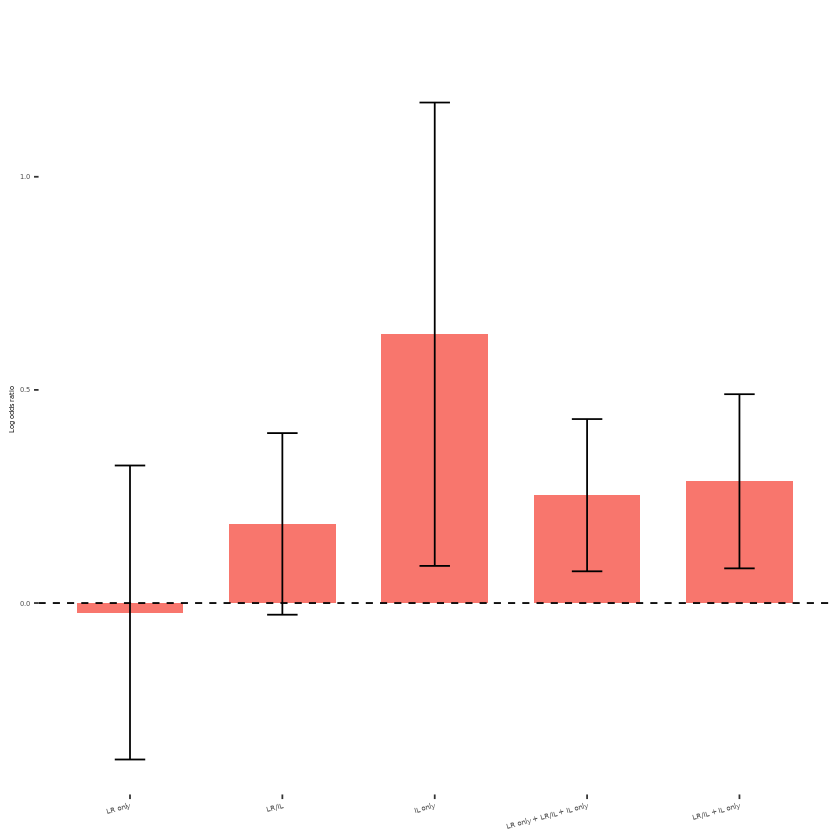

In [12]:
# plot SVs (meta)
fig_base = paste0(fts_col_names[1], '_SVs_burden_platform_', file_suf, gw_suf, '_META')
title = ''

size_txt = 4
size_sig = 8
ylim_min = -0.1
ylim_max = 1.5

w1 = 0.7 # was 0.7
w2 = 0.2 # was 0.2

fig_name = paste0(dir_fig, fig_base, ".png")

my_data_all_ont_pb$plat_labels <- factor(my_data_all_ont_pb$plat_labels, levels = plat_cats_labels_loop)

sig <- sapply(my_data_all_ont_pb$ano_pval_meta, get_pval_char)
my_data_all_ont_pb$sig = sig

base <- ggplot(my_data_all_ont_pb, aes(x = plat_labels, y = log_ORs_meta, fill = 'ref', ymin=log_ORs_minus_meta , ymax=log_ORs_plus_meta)) +
  geom_bar(stat = "identity", width = w1) +
  geom_errorbar(aes(ymin = log_ORs_minus_meta, ymax = log_ORs_plus_meta), width = w2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  geom_text(aes(label = sig, y = log_ORs_plus_meta+0.1), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
  labs(y = "Log odds ratio", title = title) +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 15, vjust = 1, hjust=1., size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt),
        legend.position = 'none',
        #legend.text = element_text(size=size_txt-5),
        #legend.title = element_text(size=size_txt),
        #plot.margin = margin(20, 120, 20, 80) # Add margins: top, right, bottom, left (in points)
        ) +
  scale_fill_discrete(name = '')

print(fig_name)
print(base)
ggsave(fig_name, width = 2.5, height = 1.75, dpi = 1200, units = "in")

In [13]:
my_data_all_ont_pb

,fts,fts_labels,plat,plat_labels,log_ORs,log_ORs_plus,log_ORs_minus,ano_pval,SEs,sum_case_con,⋯,sum_case_con_pb,wt_ont,wt_pb,se_meta,log_ORs_meta,log_ORs_plus_meta,log_ORs_minus_meta,Z_meta,ano_pval_meta,sig
,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<chr>
1,PLIp9_cds + PLIp9_utr,"pLI≥.9, exonic",lr,LR only,-0.009734345,0.2728202,-0.29228887,0.9725170,0.2825545,33/73,⋯,8/21,5.619895,2.791555,0.3447979,-0.02218885,0.3226090,-0.36698672,-0.0643532,0.9486890,
2,PLIp9_cds + PLIp9_utr,"pLI≥.9, exonic",lr_il_ilgt,LR/IL,0.149375467,0.3347932,-0.03604224,0.4172887,0.1854177,106/181,⋯,48/95,8.472183,11.559845,0.2234280,0.17247338,0.3959013,-0.05095459,0.7719418,0.4401489,
3,PLIp9_cds + PLIp9_utr,"pLI≥.9, exonic",il,IL only,0.650245605,1.0820153,0.21847592,0.1204649,0.4317697,46/83,⋯,38/73,1.099741,2.405280,0.5341395,0.49940535,1.0335448,-0.03473410,0.9349719,0.3498028,
4,PLIp9_cds + PLIp9_utr,"pLI≥.9, exonic",lr + lr_il_ilgt + il,LR only + LR/IL + IL only,0.199268065,0.3470492,0.05148691,0.1703547,0.1477812,185/337,⋯,94/189,14.415084,18.097319,0.1753781,0.22464519,0.4000233,0.04926705,1.2809190,0.2002221,
5,PLIp9_cds + PLIp9_utr,"pLI≥.9, exonic",lr_il_ilgt + il,LR/IL + IL only,0.247605431,0.4244142,0.07079667,0.1518521,0.1768088,152/264,⋯,86/168,9.479721,14.101151,0.2059302,0.25077770,0.4567079,0.04484749,1.2177800,0.2233076,


[1] "R_clogit/for_publish_fin/pli_genes_exonic_SVs_burden_platform_SQ20_SAMPLES_AD2_SAMPLES_useGWB_META_mod.png"


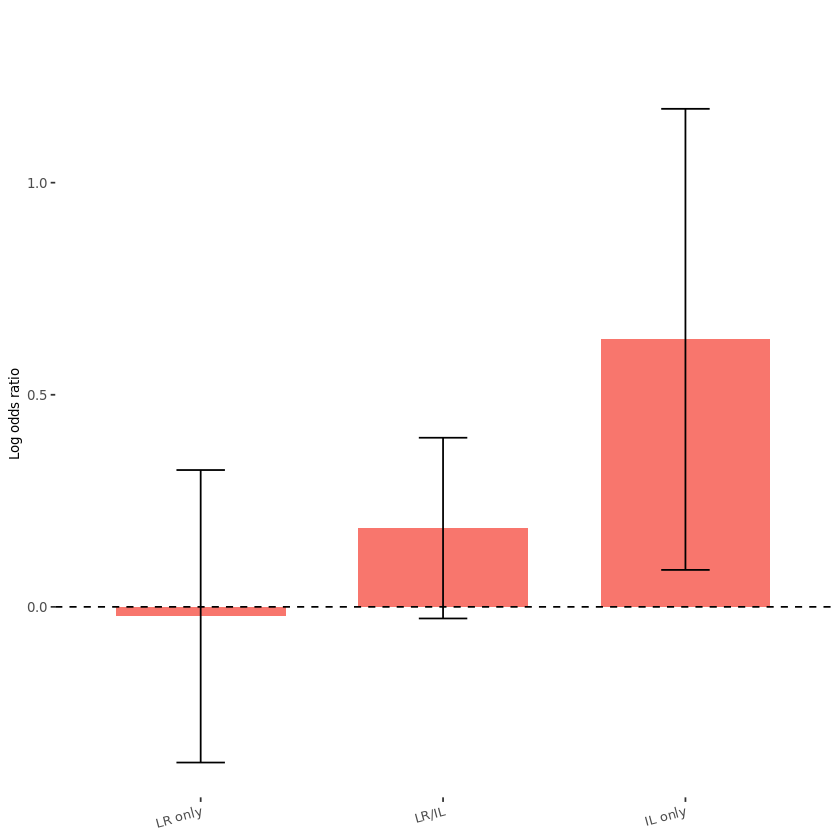

In [13]:
# plot SVs (meta)
fig_base = paste0(fts_col_names[1], '_SVs_burden_platform_', file_suf, gw_suf, '_META')
title = ''

size_txt = 8
size_sig = 8
ylim_min = -0.1
ylim_max = 1.5

w1 = 0.7 # was 0.7
w2 = 0.2 # was 0.2

fig_name = paste0(dir_fig, fig_base, "_mod.png")

my_data_all_ont_pb$plat_labels <- factor(my_data_all_ont_pb$plat_labels, levels = plat_cats_labels_loop)

sig <- sapply(my_data_all_ont_pb$ano_pval_meta, get_pval_char)
my_data_all_ont_pb$sig = sig

my_data_all_ont_pb_mod = my_data_all_ont_pb[my_data_all_ont_pb$plat %in% c('lr', 'lr_il_ilgt', 'il'),]

base <- ggplot(my_data_all_ont_pb_mod, aes(x = plat_labels, y = log_ORs_meta, fill = 'ref', ymin=log_ORs_minus_meta , ymax=log_ORs_plus_meta)) +
  geom_bar(stat = "identity", width = w1) +
  geom_errorbar(aes(ymin = log_ORs_minus_meta, ymax = log_ORs_plus_meta), width = w2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  geom_text(aes(label = sig, y = log_ORs_plus_meta+0.1), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
  labs(y = "Log odds ratio", title = title) +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 15, vjust = 1, hjust=1., size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt),
        legend.position = 'none',
        legend.text = element_text(size=size_txt-5),
        legend.title = element_text(size=size_txt),
        #plot.margin = margin(20, 120, 20, 80) # Add margins: top, right, bottom, left (in points)
        ) +
  scale_fill_discrete(name = '')

print(fig_name)
print(base)
ggsave(fig_name, width = 2., height = 1.75, dpi = 1200, units = "in")

[1] "R_clogit/for_publish_fin/pli_genes_exonic_SVs_burden_platform_SQ20_SAMPLES_AD2_SAMPLES_useGWB_MEGA.png"


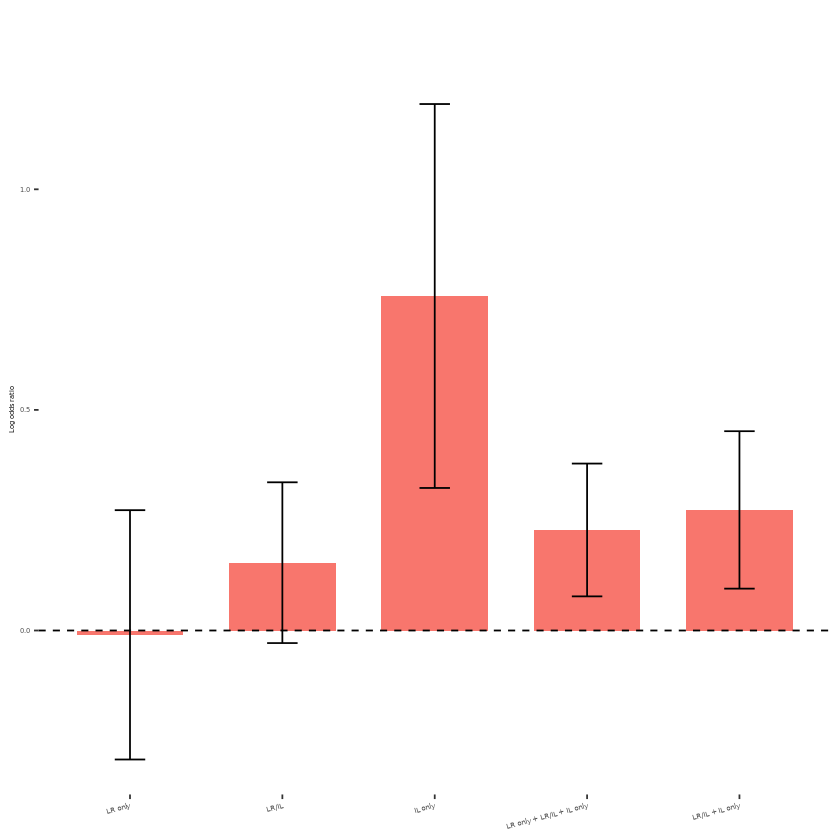

In [14]:
# plot SVs (mega)
fig_base = paste0(fts_col_names[1], '_SVs_burden_platform_', file_suf, gw_suf, '_MEGA')
title = ''

size_txt = 4
size_sig = 8
ylim_min = -0.1
ylim_max = 1.5

w1 = 0.7 # was 0.7
w2 = 0.2 # was 0.2

fig_name = paste0(dir_fig, fig_base, ".png")

my_data$plat_labels <- factor(my_data$plat_labels, levels = plat_cats_labels_loop)

sig <- sapply(my_data$ano_pval, get_pval_char)
my_data$sig = sig

base <- ggplot(my_data, aes(x = plat_labels, y = log_ORs, fill = 'ref', ymin=log_ORs_minus , ymax=log_ORs_plus)) +
  geom_bar(stat = "identity", width = w1) +
  geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = w2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  geom_text(aes(label = sig, y = log_ORs_plus+0.1), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
  labs(y = "Log odds ratio", title = title) +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 15, vjust = 1, hjust=1., size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt), 
        legend.position = 'none',
        legend.text = element_text(size=size_txt-5),
        legend.title = element_text(size=size_txt),
        #plot.margin = margin(20, 120, 20, 80) # Add margins: top, right, bottom, left (in points)
        ) +
  scale_fill_discrete(name = '')

print(fig_name)
print(base)
ggsave(fig_name, width = 2.5, height = 1.75, dpi = 1200, units = "in")

[1] "R_clogit/for_publish_fin/pli_genes_exonic_SVs_burden_platform_SQ20_SAMPLES_AD2_SAMPLES_useGWB_MEGA_mod.png"


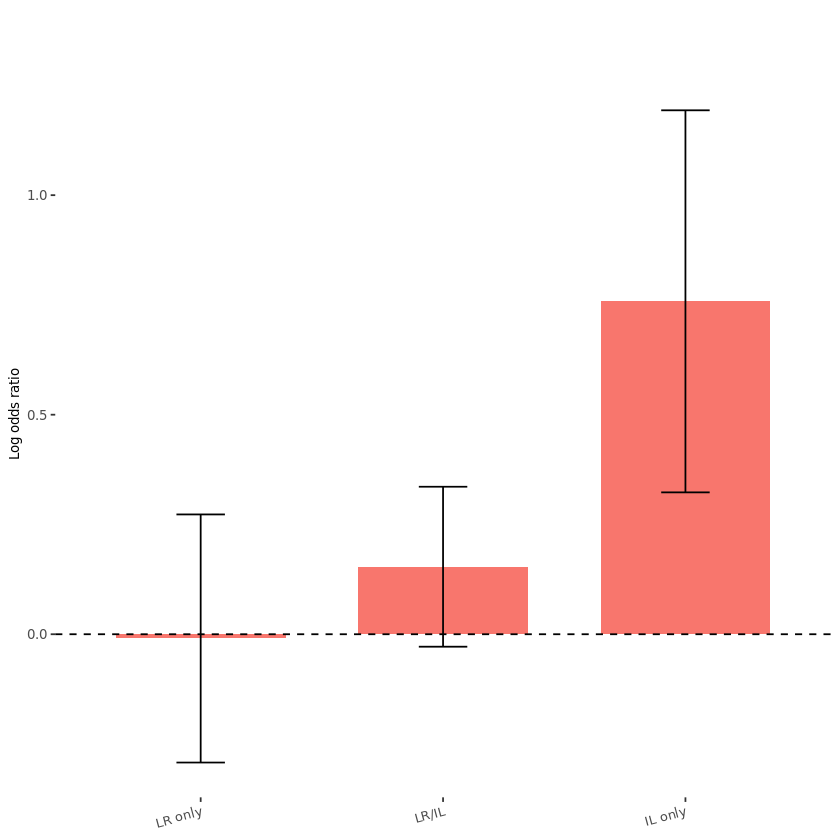

In [15]:
# plot SVs (mega)
fig_base = paste0(fts_col_names[1], '_SVs_burden_platform_', file_suf, gw_suf, '_MEGA')
title = ''

size_txt = 8
size_sig = 8
ylim_min = -0.1
ylim_max = 1.5

w1 = 0.7 # was 0.7
w2 = 0.2 # was 0.2

fig_name = paste0(dir_fig, fig_base, "_mod.png")

my_data$plat_labels <- factor(my_data$plat_labels, levels = plat_cats_labels_loop)

sig <- sapply(my_data$ano_pval, get_pval_char)
my_data$sig = sig

my_data_mod = my_data[my_data$plat %in% c('lr', 'lr_il_ilgt', 'il'),]

base <- ggplot(my_data_mod, aes(x = plat_labels, y = log_ORs, fill = 'ref', ymin=log_ORs_minus , ymax=log_ORs_plus)) +
  geom_bar(stat = "identity", width = w1) +
  geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = w2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  geom_text(aes(label = sig, y = log_ORs_plus+0.1), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
  labs(y = "Log odds ratio", title = title) +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 15, vjust = 1, hjust=1., size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt), 
        legend.position = 'none',
        legend.text = element_text(size=size_txt-5),
        legend.title = element_text(size=size_txt),
        #plot.margin = margin(20, 120, 20, 80) # Add margins: top, right, bottom, left (in points)
        ) +
  scale_fill_discrete(name = '')

print(fig_name)
print(base)
ggsave(fig_name, width = 2., height = 1.75, dpi = 1200, units = "in")